In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.rc("font", size=13)
import seaborn as sns
sns.set(style="white")

#sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

In [2]:
df_health = pd.read_csv("health_data.csv")
df_health = df_health.sample(frac=1, random_state=0)
df_health.shape

(70692, 18)

In [3]:
df_health.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
34746,8.0,1.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,14.0,0.0,0.0,0.0,1.0,0.0
11085,10.0,0.0,0.0,1.0,20.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,15.0,0.0,0.0,0.0,0.0,0.0
51382,5.0,0.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0
53894,13.0,0.0,1.0,1.0,27.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,0.0
31333,11.0,0.0,1.0,1.0,28.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0


In [4]:
df_health.tail(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
21243,5.0,0.0,0.0,1.0,27.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
45891,5.0,1.0,1.0,1.0,33.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,2.0,0.0,0.0,1.0,1.0,0.0
42613,11.0,0.0,1.0,1.0,37.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,8.0,0.0,1.0,0.0,0.0
43567,12.0,0.0,1.0,1.0,23.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
68268,7.0,0.0,0.0,1.0,29.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,5.0,0.0,0.0,1.0,1.0,0.0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import math
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

def classify(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, np.ravel(y_train))
    predictions = model.predict(x_test)
    print('Accuracy of classifier: {:.3f}'.format(model.score(x_test, y_test)))
    print(classification_report(y_test, predictions))
    cm = confusion_matrix(y_test, predictions, labels=model.classes_)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

def test_train(data_x, data_y):
    
    # Splitting data
    test_fraction = 0.3
    print('For test size = {:.2f}'.format(test_fraction))
    x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=test_fraction, random_state=42)
    
    # Feature scaling
    scaler=StandardScaler()
    x_train=scaler.fit_transform(x_train)
    x_test=scaler.transform(x_test)
    
    ################## Classification ################################
    # Logistic Regression
    print("Result for Logistic Regression:")
    logistic_reg = LogisticRegression(solver='lbfgs')
    classify(logistic_reg, x_train, x_test, y_train, y_test)
    
    # Decision Tree
    print("Result for Decision Tree:")
    decision_tree = DecisionTreeClassifier()
    classify(decision_tree, x_train, x_test, y_train, y_test)
    
    # K Nearest Neighbour
    print("Result for K Nearest Neighbour:")
    k = int(math.sqrt(x_train.shape[0]))
    print('Value of K = {}'.format(k))
    k_nearest = KNeighborsClassifier(n_neighbors=k)
    classify(k_nearest, x_train, x_test, y_train, y_test)
    
    # Gaussian Naive Bayes
    print("Result for Gaussian Naive Bayes:")
    gnaive_bayes = GaussianNB()
    classify(gnaive_bayes, x_train, x_test, y_train, y_test)
    
    # AdaBoost
    print("Result for AdaBoost:")
    adaboost = AdaBoostClassifier(n_estimators=200, random_state=0)
    classify(adaboost, x_train, x_test, y_train, y_test)
    return importances
    
    

feature_names = list(df_health.columns)
data_x = df_health[feature_names[:-3]]
#data_x = data_x.drop(['Sex','CholCheck','Smoker','Fruits','Veggies','HvyAlcoholConsump','MentHlth'],axis=1)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import math
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

def test_train_(data_x, data_y):
    test_fraction = 0.3
    print('For test size = {:.2f}'.format(test_fraction))
    x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=test_fraction, random_state=42)
    
    # Feature scaling
    scaler=StandardScaler()
    x_train=scaler.fit_transform(x_train)
    x_test=scaler.transform(x_test)
    
    ################## Classification ################################
    # Logistic Regression
    print("Result for Logistic Regression:")
    logistic_reg = LogisticRegression(solver='lbfgs')
    logistic_reg.fit(x_train, y_train)
    plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
    plt.title('Feature importances obtained from coefficients', size=20)
    plt.xticks(rotation='vertical')
    plt.show()

    
    importances = importances.sort_values(by='Importance', ascending=False)
    print(importances)
#     print(dir(x_train))
#     classify(logistic_reg, x_train, x_test, y_train, y_test)
    

################################# Results for predicting Stroke #############################
#############################################################################################
Distribution of Stroke labels: Counter({0.0: 66297, 1.0: 4395})
For test size = 0.30
Result for Logistic Regression:
Accuracy of classifier: 0.937
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     19868
         1.0       0.55      0.00      0.01      1340

    accuracy                           0.94     21208
   macro avg       0.74      0.50      0.49     21208
weighted avg       0.91      0.94      0.91     21208

[[19863     5]
 [ 1334     6]]


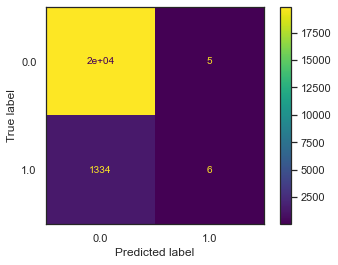

Result for Decision Tree:
Accuracy of classifier: 0.883
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94     19868
         1.0       0.15      0.18      0.16      1340

    accuracy                           0.88     21208
   macro avg       0.55      0.56      0.55     21208
weighted avg       0.89      0.88      0.89     21208

[[18485  1383]
 [ 1098   242]]


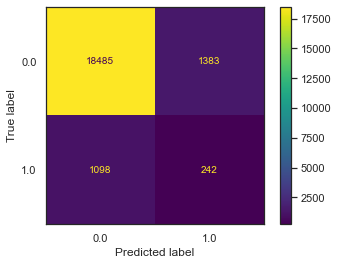

Result for K Nearest Neighbour:
Value of K = 222
Accuracy of classifier: 0.937
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     19868
         1.0       0.00      0.00      0.00      1340

    accuracy                           0.94     21208
   macro avg       0.47      0.50      0.48     21208
weighted avg       0.88      0.94      0.91     21208

[[19868     0]
 [ 1340     0]]


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


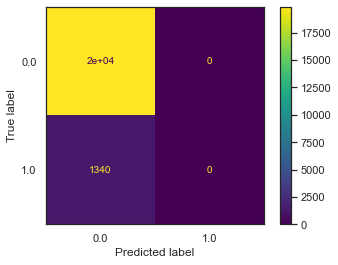

Result for Gaussian Naive Bayes:
Accuracy of classifier: 0.829
              precision    recall  f1-score   support

         0.0       0.96      0.85      0.90     19868
         1.0       0.18      0.50      0.27      1340

    accuracy                           0.83     21208
   macro avg       0.57      0.68      0.59     21208
weighted avg       0.91      0.83      0.86     21208

[[16913  2955]
 [  671   669]]


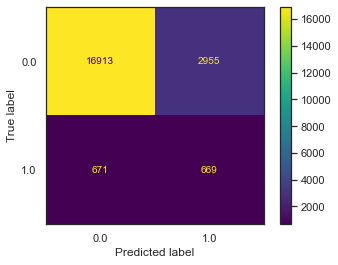

Result for AdaBoost:
Accuracy of classifier: 0.936
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     19868
         1.0       0.38      0.01      0.02      1340

    accuracy                           0.94     21208
   macro avg       0.66      0.50      0.49     21208
weighted avg       0.90      0.94      0.91     21208

[[19845    23]
 [ 1326    14]]


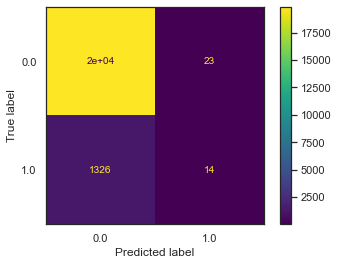

NameError: name 'importances' is not defined

In [7]:
# Predicting Stroke
# 0 - No stroke, 1 - Stroke
print("################################# Results for predicting Stroke #############################")
print("#############################################################################################")
data_y = df_health[["Stroke"]]
print("Distribution of Stroke labels:", Counter(data_y["Stroke"]))
test_train(data_x, data_y)



In [ ]:
# Predicting Hypertension
# 0 - No hypertension, 1 - Hypertension
print("########################### Results for predicting Hypertension #############################")
print("#############################################################################################")
data_y = df_health[["Hypertension"]]
print("Distribution of Hypertension labels", Counter(data_y["Hypertension"]))
test_train_(data_x, data_y)

In [ ]:
# Predicting Diabetes
# 0 - No diabetes, 1 - Diabetes
print("########################### Results for predicting Diabetes #################################")
print("#############################################################################################")
data_y = df_health[["Diabetes"]]
print("Distribution of Diabetes labels", Counter(data_y["Diabetes"]))
test_train(data_x, data_y)

In [ ]:
test_train(data_x, data_y)